
## Create dataset time delays 1 hour , 6 hours, pre-cast

* time delays


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('FINAL_RNN_mapped_dates_266096_rcalix.csv')


In [6]:

for_RNN_data_CIVS.head(5)


,Unnamed: 0,Timestamp_f1,MM_Timestamp_f1,THEORETICAL_TONNAGE_f3,Coke_Rate_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,SNORT_VALVE_POSITION_f3,COLD_BLAST_MOISTURE_f3,HOST_BLAST_MOISTURE_f3,...,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2
0,0,2021-08-01 01:23:00,2021-08-01 00:00:00,6006,992,1999.604384,179.749638,98.334297,4.997585,8.084517,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
1,1,2021-08-01 01:23:00,2021-08-01 00:01:00,6006,992,2000.288837,179.765945,98.334297,5.000531,8.079545,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
2,2,2021-08-01 01:23:00,2021-08-01 00:02:00,6006,992,1999.242862,179.782251,98.334297,5.003476,8.074573,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
3,3,2021-08-01 01:23:00,2021-08-01 00:03:00,6006,992,1999.884442,179.798490,98.334297,5.006422,8.069602,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
4,4,2021-08-01 01:23:00,2021-08-01 00:04:00,6006,992,1999.849729,179.784430,98.334297,5.009368,8.064630,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41


In [7]:

for_RNN_data_CIVS.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266096 entries, 0 to 266095
Data columns (total 110 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    Unnamed: 0                 int64  
 1    Timestamp_f1               object 
 2    MM_Timestamp_f1            object 
 3    THEORETICAL_TONNAGE_f3     int64  
 4    Coke_Rate_f3               int64  
 5    HOT_BLAST_TMP_NS_f3        float64
 6    WINDRATE_f3                float64
 7    SNORT_VALVE_POSITION_f3    float64
 8    COLD_BLAST_MOISTURE_f3     float64
 9    HOST_BLAST_MOISTURE_f3     float64
 10   HIGH_PURITY_OXYGEN_f3      float64
 11   COAL_FLOW_f3               float64
 12   NAT_GAS _INJECTION_f3      float64
 13   HOT_BLAST_PRESSURE_f3      float64
 14   TOP_PRESS_f3               float64
 15   TOP_TEMP_HIGHEST_f3        float64
 16   Top_Gas_ETACO_f3           float64
 17   Selec_Top_Gas_CO_f3        float64
 18   Selec_Top_Gas_CO2_f3       float64
 19   Selec_Top_Gas_H2_f3  

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes

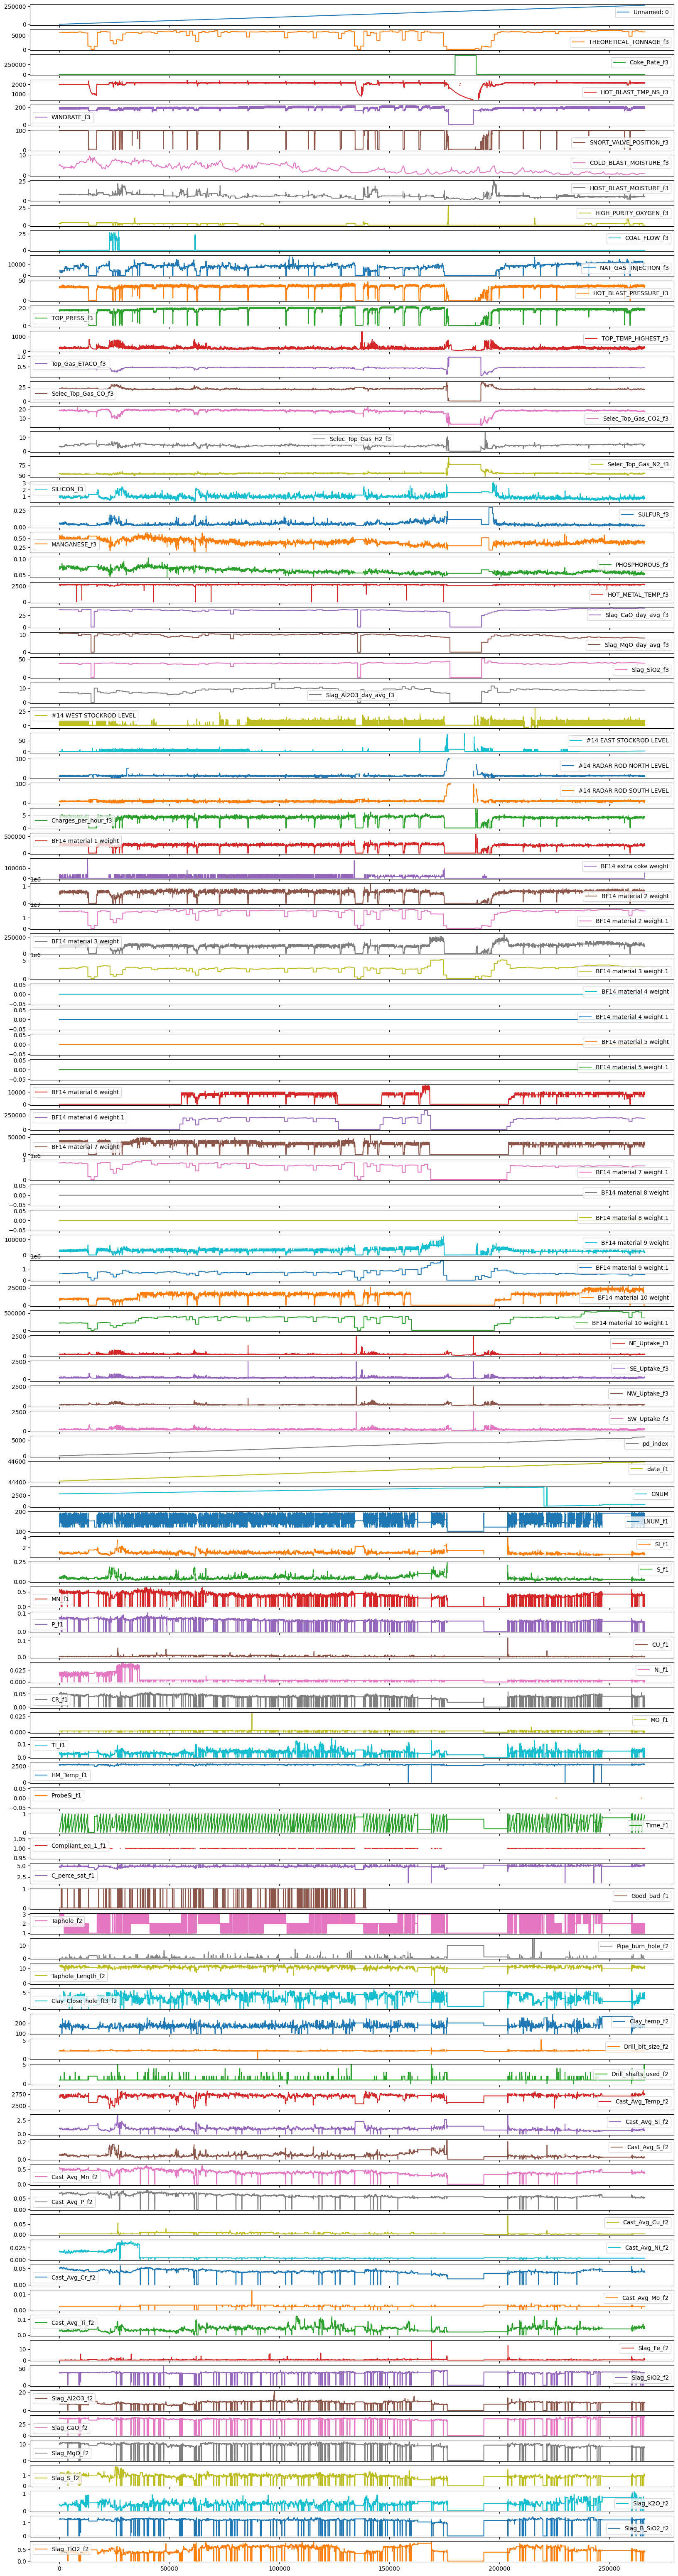

In [8]:

for_RNN_data_CIVS.plot( figsize=(20,80),  subplots=True   )


In [9]:

for_RNN_data_CIVS


,Unnamed: 0,Timestamp_f1,MM_Timestamp_f1,THEORETICAL_TONNAGE_f3,Coke_Rate_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,SNORT_VALVE_POSITION_f3,COLD_BLAST_MOISTURE_f3,HOST_BLAST_MOISTURE_f3,...,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2
0,0,2021-08-01 01:23:00,2021-08-01 00:00:00,6006,992,1999.604384,179.749638,98.334297,4.997585,8.084517,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
1,1,2021-08-01 01:23:00,2021-08-01 00:01:00,6006,992,2000.288837,179.765945,98.334297,5.000531,8.079545,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
2,2,2021-08-01 01:23:00,2021-08-01 00:02:00,6006,992,1999.242862,179.782251,98.334297,5.003476,8.074573,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
3,3,2021-08-01 01:23:00,2021-08-01 00:03:00,6006,992,1999.884442,179.798490,98.334297,5.006422,8.069602,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
4,4,2021-08-01 01:23:00,2021-08-01 00:04:00,6006,992,1999.849729,179.784430,98.334297,5.009368,8.064630,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266091,266091,2022-01-31 22:16:00,2022-01-31 22:12:00,6322,924,2167.603916,189.029098,98.334297,1.151288,5.105940,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42
266092,266092,2022-01-31 22:16:00,2022-01-31 22:13:00,6322,924,2167.404841,188.892415,98.334297,1.151910,5.110442,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42
266093,266093,2022-01-31 22:16:00,2022-01-31 22:14:00,6322,924,2167.205766,188.689857,98.334297,1.152533,5.114944,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42
266094,266094,2022-01-31 22:16:00,2022-01-31 22:15:00,6322,924,2167.006691,188.610793,98.334297,1.153156,5.119446,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42


In [10]:

for_RNN_data_CIVS['MM_Timestamp_f1'][1000:1400]


1000    2021-08-01 16:40:00
1001    2021-08-01 16:41:00
1002    2021-08-01 16:42:00
1003    2021-08-01 16:43:00
1004    2021-08-01 16:44:00
               ...         
1395    2021-08-01 23:15:00
1396    2021-08-01 23:16:00
1397    2021-08-01 23:17:00
1398    2021-08-01 23:18:00
1399    2021-08-01 23:19:00
Name: MM_Timestamp_f1, Length: 400, dtype: object


## Select columns to use in the dataframe 


In [12]:

all_columns_in_DF = for_RNN_data_CIVS.columns.values.tolist()
all_columns_in_DF


['Unnamed: 0',
 'Timestamp_f1',
 'MM_Timestamp_f1',
 'THEORETICAL_TONNAGE_f3',
 'Coke_Rate_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'SNORT_VALVE_POSITION_f3',
 'COLD_BLAST_MOISTURE_f3',
 'HOST_BLAST_MOISTURE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'HOT_BLAST_PRESSURE_f3',
 'TOP_PRESS_f3',
 'TOP_TEMP_HIGHEST_f3',
 'Top_Gas_ETACO_f3 ',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'SILICON_f3',
 'SULFUR_f3',
 'MANGANESE_f3',
 'PHOSPHOROUS_f3',
 'HOT_METAL_TEMP_f3',
 'Slag_CaO_day_avg_f3',
 'Slag_MgO_day_avg_f3',
 'Slag_SiO2_f3',
 'Slag_Al2O3_day_avg_f3',
 '#14 WEST STOCKROD LEVEL',
 '#14 EAST STOCKROD LEVEL',
 '#14 RADAR ROD NORTH LEVEL',
 '#14 RADAR ROD SOUTH LEVEL',
 'Charges_per_hour_f3',
 'BF14 material 1 weight',
 'BF14 extra coke weight',
 'BF14 material 2 weight',
 'BF14 material 2 weight.1',
 'BF14 material 3 weight',
 'BF14 material 3 weight.1',
 'BF14 material 4 weight',
 'BF14 material 

In [13]:
'''

1. HB Moist (from 265,000 row file) – Hot blast moisture, should have an impact within 1hr

2. Top Gas -> Avg the following [uptakeSW.1, uptakeNE.1, uptakeSE.1, uptakeNW.1] (from 265,000 row file ) 
– Top gas temperatures, should have an impact within 1hr

3. TGC0.1       (from 265,000 row file) – Top gas CO content, should have an impact within 1hr

4. TGC02.1      (from 265,000 row file) – Top gas CO2 content, should have an impact within 1hr

5. TGH2.1       (from 265,000 row file) – Top gas H2 content, should have an impact within 1hr

6. TGN2.1       (from 265,000 row file) – Top gas N2 content, should have an impact within 1hr

7. HB Temp.1 (from 265,000 row file) – Hot blast temperature, should have an impact within 1hr

8. WINDRATE_f3 - Blast furnace wind rate (kSCFM), should have an impact within 1hr

9. HIGH_PURITY_OXYGEN_f3 - Oxygen enrichment, should have an impact within 1hr

10. COAL_FLOW_f3 - Coal injection rate, should have an impact within 1hr

11. NAT_GAS_INJECTION_f3 - Natural gas injection rate, should have an impact within 1hr

12. Coke_Rate (check with USS to determine the hrly charge Coke Rate) - include later - 6hrs impact


Previous cast average values of:

13. Cast_Avg_Si_f2 (timestamp from 6000 row file)

14. Cast_Avg_Mn_f2 (timestamp from 6000 row file)

15. Slag_Fe_f2 (timestamp from 6000 row file)


'''

 
 


selected_columns_RNN = [ 'SI_f1','Timestamp_f1', 'MM_Timestamp_f1',  'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                       'NAT_GAS _INJECTION_f3',  'WINDRATE_f3',  'HIGH_PURITY_OXYGEN_f3', 'COAL_FLOW_f3', 'Coke_Rate_f3', 
                       'Cast_Avg_Si_f2', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2',  'date_f1', 'CNUM', 'LNUM_f1', 'SILICON_f3',
                       'Selec_Top_Gas_CO_f3',  'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 'Selec_Top_Gas_N2_f3',
                       'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3'  
                       ]
                        
## 'HOT_BLAST_PRESSURE_f3', 'TOP_PRESS_f3', 'TOP_TEMP_HIGHEST_f3', 'SULFUR_f3', 'HOT_METAL_TEMP_f3',
## 'Charges_per_hour_f3', 'HM_Temp_f1', 'Time_f1', 'date', 'Slag_Time_f2', 'Open_Time_f2', 
## 'Close_Time_f2', 'Slag_SiO2_f3',  'Slag_SiO2_f2'


In [14]:

selected_columns_RNN


['SI_f1',
 'Timestamp_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'date_f1',
 'CNUM',
 'LNUM_f1',
 'SILICON_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3']

In [15]:

selected_cols_for_RNN_data_CIVS_df = for_RNN_data_CIVS[  selected_columns_RNN  ]


In [16]:

selected_cols_for_RNN_data_CIVS_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266096 entries, 0 to 266095
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   238453 non-null  float64
 1   Timestamp_f1            266096 non-null  object 
 2   MM_Timestamp_f1         266096 non-null  object 
 3   HOST_BLAST_MOISTURE_f3  266021 non-null  float64
 4   HOT_BLAST_TMP_NS_f3     263024 non-null  float64
 5   NAT_GAS _INJECTION_f3   266021 non-null  float64
 6   WINDRATE_f3             266013 non-null  float64
 7   HIGH_PURITY_OXYGEN_f3   266021 non-null  float64
 8   COAL_FLOW_f3            266021 non-null  float64
 9   Coke_Rate_f3            266096 non-null  int64  
 10  Cast_Avg_Si_f2          266096 non-null  float64
 11  Cast_Avg_Mn_f2          266096 non-null  float64
 12  Slag_Fe_f2              266096 non-null  float64
 13  date_f1                 266096 non-null  int64  
 14  CNUM                

In [17]:

selected_cols_for_RNN_data_CIVS_df 


,SI_f1,Timestamp_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Coke_Rate_f3,...,LNUM_f1,SILICON_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3
0,1.152,2021-08-01 01:23:00,2021-08-01 00:00:00,8.084517,1999.604384,4034.234339,179.749638,2.510680,0.0,992,...,182,0.776,22.322068,18.729296,3.559210,54.250139,158.478922,245.634175,145.396538,220.717349
1,1.152,2021-08-01 01:23:00,2021-08-01 00:01:00,8.079545,2000.288837,4024.947376,179.765945,2.489381,0.0,992,...,182,0.776,22.335329,18.731320,3.559234,54.194257,159.637733,252.459217,145.570895,226.360600
2,1.152,2021-08-01 01:23:00,2021-08-01 00:02:00,8.074573,1999.242862,4011.601682,179.782251,2.489037,0.0,992,...,182,0.776,22.348590,18.733343,3.559259,54.138374,160.796544,252.645736,145.745252,230.297540
3,1.152,2021-08-01 01:23:00,2021-08-01 00:03:00,8.069602,1999.884442,4012.024633,179.798490,2.496867,0.0,992,...,182,0.776,22.361852,18.735367,3.559284,54.082797,161.955355,247.987563,145.919609,225.220292
4,1.152,2021-08-01 01:23:00,2021-08-01 00:04:00,8.064630,1999.849729,4000.467204,179.784430,2.501961,0.0,992,...,182,0.776,22.375113,18.737391,3.559309,54.063779,163.102736,226.923719,146.093966,218.827693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266091,0.547,2022-01-31 22:16:00,2022-01-31 22:12:00,5.105940,2167.603916,10497.271240,189.029098,0.000000,0.0,924,...,138,0.795,21.187997,17.110034,4.891530,55.081109,184.027980,272.239649,194.782045,278.493586
266092,0.547,2022-01-31 22:16:00,2022-01-31 22:13:00,5.110442,2167.404841,10524.821170,188.892415,0.000000,0.0,924,...,138,0.795,21.187670,17.108010,4.892282,55.089262,184.021092,267.144444,194.535199,272.149670
266093,0.547,2022-01-31 22:16:00,2022-01-31 22:14:00,5.114944,2167.205766,10520.260680,188.689857,0.000000,0.0,924,...,138,0.795,21.187344,17.105986,4.893035,55.097414,184.014203,264.294662,194.527872,267.771017
266094,0.547,2022-01-31 22:16:00,2022-01-31 22:15:00,5.119446,2167.006691,10518.901880,188.610793,0.000000,0.0,924,...,138,0.795,21.187018,17.103962,4.893787,55.108332,184.007315,265.552978,194.520545,266.423241



## Fill in missing values


In [18]:

# to interpolate the missing values  
selected_cols_for_RNN_data_CIVS_df = selected_cols_for_RNN_data_CIVS_df.interpolate(method ='linear', limit_direction ='forward') 


In [19]:

'''

## linear

BEFORE

2, NaN, 6

AFTER

2, 4, 6

'''


'\n\n## linear\n\nBEFORE\n\n2, NaN, 6\n\nAFTER\n\n2, 4, 6\n\n'


## count missing null values


In [20]:

null_count = selected_cols_for_RNN_data_CIVS_df.isnull().sum().sum()
print('Number of null values:', null_count)


Number of null values: 0


In [21]:

sum(map(any, selected_cols_for_RNN_data_CIVS_df.isnull()))


25

In [22]:

df = selected_cols_for_RNN_data_CIVS_df 

# TOTAL number of missing values:
print( df.isna().sum().sum() )


# number of ROWS with at least one missing value:
print( (df.isna().sum(axis=1) > 0).sum() )


# number of COLUMNS with at least one missing value:
print( (df.isna().sum(axis=0) > 0).sum() )



0
0
0


In [23]:

print (df.isna().any(axis=1).sum())


0


In [24]:

# check for NaN values in each column
print(df.isnull().any())


SI_f1                     False
Timestamp_f1              False
MM_Timestamp_f1           False
HOST_BLAST_MOISTURE_f3    False
HOT_BLAST_TMP_NS_f3       False
NAT_GAS _INJECTION_f3     False
WINDRATE_f3               False
HIGH_PURITY_OXYGEN_f3     False
COAL_FLOW_f3              False
Coke_Rate_f3              False
Cast_Avg_Si_f2            False
Cast_Avg_Mn_f2            False
Slag_Fe_f2                False
date_f1                   False
CNUM                      False
LNUM_f1                   False
SILICON_f3                False
Selec_Top_Gas_CO_f3       False
Selec_Top_Gas_CO2_f3      False
Selec_Top_Gas_H2_f3       False
Selec_Top_Gas_N2_f3       False
NE_Uptake_f3              False
SE_Uptake_f3              False
NW_Uptake_f3              False
SW_Uptake_f3              False
dtype: bool



## Create vectors with 1 hour time delay


In [25]:

cols_rotation_DF = selected_cols_for_RNN_data_CIVS_df.columns.values.tolist()
cols_rotation_DF



['SI_f1',
 'Timestamp_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'date_f1',
 'CNUM',
 'LNUM_f1',
 'SILICON_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3']

In [26]:

idx = selected_cols_for_RNN_data_CIVS_df.index[ : -60]
print(idx)


RangeIndex(start=0, stop=266036, step=1)


In [27]:

y_1_hour = selected_cols_for_RNN_data_CIVS_df.iloc[ 60: , 0 ].values
y_1_hour.shape


(266036,)

In [28]:

y_1_hour


array([1.15199995, 1.15199995, 1.15199995, ..., 0.54699999, 0.54699999,
       0.54699999])

In [29]:

x_1_hour = selected_cols_for_RNN_data_CIVS_df.iloc[ :-60 , 1: ].values
x_1_hour.shape


(266036, 24)

In [30]:

cols_rotation_DF[0]


'SI_f1'

In [31]:

cols_rotation_DF[1:]


['Timestamp_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'date_f1',
 'CNUM',
 'LNUM_f1',
 'SILICON_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3']

In [32]:

df_xs = pd.DataFrame(x_1_hour  , columns=cols_rotation_DF[1:],  index=idx)
df_y  = pd.DataFrame(y_1_hour  , columns=[cols_rotation_DF[0]],   index=idx)


In [33]:

print(df_y.shape)
print(df_xs.shape)



(266036, 1)
(266036, 24)


In [34]:

df_res = pd.concat( [ df_y, df_xs], axis=1 )     
print(df_res.shape)


(266036, 25)


In [38]:

df_res


,SI_f1,Timestamp_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Coke_Rate_f3,...,LNUM_f1,SILICON_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3
0,1.152,2021-08-01 01:23:00,2021-08-01 00:00:00,8.084517,1999.604384,4034.234339,179.749638,2.51068,0.0,992,...,182,0.776,22.322068,18.729296,3.55921,54.250139,158.478922,245.634175,145.396538,220.717349
1,1.152,2021-08-01 01:23:00,2021-08-01 00:01:00,8.079545,2000.288837,4024.947376,179.765945,2.489381,0.0,992,...,182,0.776,22.335329,18.73132,3.559234,54.194257,159.637733,252.459217,145.570895,226.3606
2,1.152,2021-08-01 01:23:00,2021-08-01 00:02:00,8.074573,1999.242862,4011.601682,179.782251,2.489037,0.0,992,...,182,0.776,22.34859,18.733343,3.559259,54.138374,160.796544,252.645736,145.745252,230.29754
3,1.152,2021-08-01 01:23:00,2021-08-01 00:03:00,8.069602,1999.884442,4012.024633,179.79849,2.496867,0.0,992,...,182,0.776,22.361852,18.735367,3.559284,54.082797,161.955355,247.987563,145.919609,225.220292
4,1.152,2021-08-01 01:23:00,2021-08-01 00:04:00,8.06463,1999.849729,4000.467204,179.78443,2.501961,0.0,992,...,182,0.776,22.375113,18.737391,3.559309,54.063779,163.102736,226.923719,146.093966,218.827693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266031,0.547,2022-01-31 21:30:00,2022-01-31 21:12:00,4.981627,2174.899313,10620.49515,188.993001,0.0,0.0,924,...,163,0.795,20.854527,17.689334,4.846401,55.132804,196.612741,267.719341,196.221527,278.189645
266032,0.547,2022-01-31 21:30:00,2022-01-31 21:13:00,4.980083,2174.592584,10623.51867,188.906476,0.0,0.0,924,...,163,0.795,20.857395,17.694005,4.847153,55.118269,199.742893,276.810006,201.267301,285.654885
266033,0.547,2022-01-31 21:30:00,2022-01-31 21:14:00,4.97854,2174.285856,10615.34871,188.819951,0.0,0.0,924,...,163,0.795,20.860262,17.698676,4.847906,55.09606,197.133126,274.928284,199.340433,283.455161
266034,0.547,2022-01-31 21:30:00,2022-01-31 21:15:00,4.976996,2173.979127,10611.02002,188.733854,0.0,0.0,924,...,163,0.795,20.863363,17.703347,4.848658,55.067112,192.988254,267.724543,195.780749,278.23466


In [39]:
'''
1. HB Moist (from 265,000 row file) – Hot blast moisture, should have an impact within 1hr

2. Top Gas -> Avg the following [uptakeSW.1, uptakeNE.1, uptakeSE.1, uptakeNW.1] (from 265,000 row file ) 
– Top gas temperatures, should have an impact within 1hr

3. TGC0.1       (from 265,000 row file) – Top gas CO content, should have an impact within 1hr

4. TGC02.1      (from 265,000 row file) – Top gas CO2 content, should have an impact within 1hr

5. TGH2.1       (from 265,000 row file) – Top gas H2 content, should have an impact within 1hr

6. TGN2.1       (from 265,000 row file) – Top gas N2 content, should have an impact within 1hr

7. HB Temp.1 (from 265,000 row file) – Hot blast temperature, should have an impact within 1hr

8. WINDRATE_f3 - Blast furnace wind rate (kSCFM), should have an impact within 1hr

9. HIGH_PURITY_OXYGEN_f3 - Oxygen enrichment, should have an impact within 1hr

10. COAL_FLOW_f3 - Coal injection rate, should have an impact within 1hr

11. NAT_GAS_INJECTION_f3 - Natural gas injection rate, should have an impact within 1hr

12. Coke_Rate (check with USS to determine the hrly charge Coke Rate) - include later - 6hrs impact


Previous cast average values of:

13. Cast_Avg_Si_f2 (timestamp from 6000 row file)

14. Cast_Avg_Mn_f2 (timestamp from 6000 row file)

15. Slag_Fe_f2 (timestamp from 6000 row file)


'''

 
 


cols_1_hour_rc = [ 'SI_f1', 'MM_Timestamp_f1', 'HOST_BLAST_MOISTURE_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 
                   'SW_Uptake_f3', 'Selec_Top_Gas_CO_f3',  'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 'Selec_Top_Gas_N2_f3',
                   'HOT_BLAST_TMP_NS_f3',  'WINDRATE_f3',  'HIGH_PURITY_OXYGEN_f3',  'COAL_FLOW_f3',
                    'NAT_GAS _INJECTION_f3']


In [40]:

cols_1_hour_rc 


['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3']

In [41]:

df_si_1hour_xs = df_res[ cols_1_hour_rc  ]


In [42]:

df_si_1hour_xs


,SI_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3
0,1.152,2021-08-01 00:00:00,8.084517,158.478922,245.634175,145.396538,220.717349,22.322068,18.729296,3.55921,54.250139,1999.604384,179.749638,2.51068,0.0,4034.234339
1,1.152,2021-08-01 00:01:00,8.079545,159.637733,252.459217,145.570895,226.3606,22.335329,18.73132,3.559234,54.194257,2000.288837,179.765945,2.489381,0.0,4024.947376
2,1.152,2021-08-01 00:02:00,8.074573,160.796544,252.645736,145.745252,230.29754,22.34859,18.733343,3.559259,54.138374,1999.242862,179.782251,2.489037,0.0,4011.601682
3,1.152,2021-08-01 00:03:00,8.069602,161.955355,247.987563,145.919609,225.220292,22.361852,18.735367,3.559284,54.082797,1999.884442,179.79849,2.496867,0.0,4012.024633
4,1.152,2021-08-01 00:04:00,8.06463,163.102736,226.923719,146.093966,218.827693,22.375113,18.737391,3.559309,54.063779,1999.849729,179.78443,2.501961,0.0,4000.467204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266031,0.547,2022-01-31 21:12:00,4.981627,196.612741,267.719341,196.221527,278.189645,20.854527,17.689334,4.846401,55.132804,2174.899313,188.993001,0.0,0.0,10620.49515
266032,0.547,2022-01-31 21:13:00,4.980083,199.742893,276.810006,201.267301,285.654885,20.857395,17.694005,4.847153,55.118269,2174.592584,188.906476,0.0,0.0,10623.51867
266033,0.547,2022-01-31 21:14:00,4.97854,197.133126,274.928284,199.340433,283.455161,20.860262,17.698676,4.847906,55.09606,2174.285856,188.819951,0.0,0.0,10615.34871
266034,0.547,2022-01-31 21:15:00,4.976996,192.988254,267.724543,195.780749,278.23466,20.863363,17.703347,4.848658,55.067112,2173.979127,188.733854,0.0,0.0,10611.02002



## Now add 6 hour delay 


In [43]:

selected_cols_for_RNN_data_CIVS_df


,SI_f1,Timestamp_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Coke_Rate_f3,...,LNUM_f1,SILICON_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3
0,1.152,2021-08-01 01:23:00,2021-08-01 00:00:00,8.084517,1999.604384,4034.234339,179.749638,2.510680,0.0,992,...,182,0.776,22.322068,18.729296,3.559210,54.250139,158.478922,245.634175,145.396538,220.717349
1,1.152,2021-08-01 01:23:00,2021-08-01 00:01:00,8.079545,2000.288837,4024.947376,179.765945,2.489381,0.0,992,...,182,0.776,22.335329,18.731320,3.559234,54.194257,159.637733,252.459217,145.570895,226.360600
2,1.152,2021-08-01 01:23:00,2021-08-01 00:02:00,8.074573,1999.242862,4011.601682,179.782251,2.489037,0.0,992,...,182,0.776,22.348590,18.733343,3.559259,54.138374,160.796544,252.645736,145.745252,230.297540
3,1.152,2021-08-01 01:23:00,2021-08-01 00:03:00,8.069602,1999.884442,4012.024633,179.798490,2.496867,0.0,992,...,182,0.776,22.361852,18.735367,3.559284,54.082797,161.955355,247.987563,145.919609,225.220292
4,1.152,2021-08-01 01:23:00,2021-08-01 00:04:00,8.064630,1999.849729,4000.467204,179.784430,2.501961,0.0,992,...,182,0.776,22.375113,18.737391,3.559309,54.063779,163.102736,226.923719,146.093966,218.827693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266091,0.547,2022-01-31 22:16:00,2022-01-31 22:12:00,5.105940,2167.603916,10497.271240,189.029098,0.000000,0.0,924,...,138,0.795,21.187997,17.110034,4.891530,55.081109,184.027980,272.239649,194.782045,278.493586
266092,0.547,2022-01-31 22:16:00,2022-01-31 22:13:00,5.110442,2167.404841,10524.821170,188.892415,0.000000,0.0,924,...,138,0.795,21.187670,17.108010,4.892282,55.089262,184.021092,267.144444,194.535199,272.149670
266093,0.547,2022-01-31 22:16:00,2022-01-31 22:14:00,5.114944,2167.205766,10520.260680,188.689857,0.000000,0.0,924,...,138,0.795,21.187344,17.105986,4.893035,55.097414,184.014203,264.294662,194.527872,267.771017
266094,0.547,2022-01-31 22:16:00,2022-01-31 22:15:00,5.119446,2167.006691,10518.901880,188.610793,0.000000,0.0,924,...,138,0.795,21.187018,17.103962,4.893787,55.108332,184.007315,265.552978,194.520545,266.423241


In [44]:

x_coke_6_df = selected_cols_for_RNN_data_CIVS_df['Coke_Rate_f3']
x_coke_6_df.shape 


(266096,)

In [45]:

x_coke_6_df


0         992
1         992
2         992
3         992
4         992
         ... 
266091    924
266092    924
266093    924
266094    924
266095    924
Name: Coke_Rate_f3, Length: 266096, dtype: int64

In [46]:

60*6


360

In [47]:

x_coke_6_hour = x_coke_6_df.iloc[ 360:  ].values
x_coke_6_hour.shape



(265736,)

In [48]:

df_si_1hour_xs.shape


(266036, 16)

In [49]:

266036 - 300


265736

In [50]:

si_and_1_hour_x = df_si_1hour_xs.iloc[ :-300 , :  ].values
si_and_1_hour_x.shape


(265736, 16)

In [51]:

cols_rotation_DF = df_si_1hour_xs.columns.values.tolist()
cols_rotation_DF


['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3']

In [52]:


idx = df_si_1hour_xs.index[ : -300]
print(idx)


RangeIndex(start=0, stop=265736, step=1)


In [53]:

df_si_x    = pd.DataFrame(si_and_1_hour_x , columns=cols_rotation_DF,         index=idx)
df_x_coke  = pd.DataFrame(x_coke_6_hour   , columns=['Coke_Rate_f3'],         index=idx)



In [54]:

print(df_x_coke.shape)
print(df_si_x.shape)


(265736, 1)
(265736, 16)


In [55]:


df_res_1h_6h = pd.concat( [ df_si_x, df_x_coke], axis=1 )     
print(df_res_1h_6h .shape)


(265736, 17)


In [56]:

df_res_1h_6h 


,SI_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,Coke_Rate_f3
0,1.152,2021-08-01 00:00:00,8.084517,158.478922,245.634175,145.396538,220.717349,22.322068,18.729296,3.55921,54.250139,1999.604384,179.749638,2.51068,0.0,4034.234339,992
1,1.152,2021-08-01 00:01:00,8.079545,159.637733,252.459217,145.570895,226.3606,22.335329,18.73132,3.559234,54.194257,2000.288837,179.765945,2.489381,0.0,4024.947376,992
2,1.152,2021-08-01 00:02:00,8.074573,160.796544,252.645736,145.745252,230.29754,22.34859,18.733343,3.559259,54.138374,1999.242862,179.782251,2.489037,0.0,4011.601682,992
3,1.152,2021-08-01 00:03:00,8.069602,161.955355,247.987563,145.919609,225.220292,22.361852,18.735367,3.559284,54.082797,1999.884442,179.79849,2.496867,0.0,4012.024633,992
4,1.152,2021-08-01 00:04:00,8.06463,163.102736,226.923719,146.093966,218.827693,22.375113,18.737391,3.559309,54.063779,1999.849729,179.78443,2.501961,0.0,4000.467204,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265731,0.662065,2022-01-31 16:12:00,5.155158,168.935281,202.117809,163.555824,219.714757,20.510372,17.817248,4.376637,55.682915,2162.689809,188.599806,0.0,0.0,9680.930154,924
265732,0.662446,2022-01-31 16:13:00,5.161362,170.715532,202.106673,164.493156,220.911245,20.510606,17.815391,4.376798,55.688159,2162.438593,188.536026,0.0,0.0,9665.389423,924
265733,0.662826,2022-01-31 16:14:00,5.167567,172.495783,205.875063,165.430489,222.902059,20.51084,17.813534,4.376959,55.693057,2162.032539,189.264351,0.0,0.0,9652.217004,924
265734,0.663207,2022-01-31 16:15:00,5.173771,174.440392,212.764586,166.688229,232.269437,20.511074,17.811677,4.377119,55.697567,2160.858603,189.426471,0.0,0.0,9661.236786,924



## Now the precast ones


In [57]:

df_res_1h_6h 


,SI_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,Coke_Rate_f3
0,1.152,2021-08-01 00:00:00,8.084517,158.478922,245.634175,145.396538,220.717349,22.322068,18.729296,3.55921,54.250139,1999.604384,179.749638,2.51068,0.0,4034.234339,992
1,1.152,2021-08-01 00:01:00,8.079545,159.637733,252.459217,145.570895,226.3606,22.335329,18.73132,3.559234,54.194257,2000.288837,179.765945,2.489381,0.0,4024.947376,992
2,1.152,2021-08-01 00:02:00,8.074573,160.796544,252.645736,145.745252,230.29754,22.34859,18.733343,3.559259,54.138374,1999.242862,179.782251,2.489037,0.0,4011.601682,992
3,1.152,2021-08-01 00:03:00,8.069602,161.955355,247.987563,145.919609,225.220292,22.361852,18.735367,3.559284,54.082797,1999.884442,179.79849,2.496867,0.0,4012.024633,992
4,1.152,2021-08-01 00:04:00,8.06463,163.102736,226.923719,146.093966,218.827693,22.375113,18.737391,3.559309,54.063779,1999.849729,179.78443,2.501961,0.0,4000.467204,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265731,0.662065,2022-01-31 16:12:00,5.155158,168.935281,202.117809,163.555824,219.714757,20.510372,17.817248,4.376637,55.682915,2162.689809,188.599806,0.0,0.0,9680.930154,924
265732,0.662446,2022-01-31 16:13:00,5.161362,170.715532,202.106673,164.493156,220.911245,20.510606,17.815391,4.376798,55.688159,2162.438593,188.536026,0.0,0.0,9665.389423,924
265733,0.662826,2022-01-31 16:14:00,5.167567,172.495783,205.875063,165.430489,222.902059,20.51084,17.813534,4.376959,55.693057,2162.032539,189.264351,0.0,0.0,9652.217004,924
265734,0.663207,2022-01-31 16:15:00,5.173771,174.440392,212.764586,166.688229,232.269437,20.511074,17.811677,4.377119,55.697567,2160.858603,189.426471,0.0,0.0,9661.236786,924


In [58]:

list_counts = selected_cols_for_RNN_data_CIVS_df.groupby(['Timestamp_f1'])['SI_f1'].count().tolist()
list_counts

[1,
 1,
 84,
 41,
 65,
 21,
 35,
 45,
 55,
 54,
 51,
 30,
 50,
 41,
 34,
 20,
 73,
 47,
 30,
 53,
 18,
 54,
 40,
 75,
 31,
 55,
 29,
 46,
 9,
 57,
 21,
 53,
 51,
 16,
 51,
 1,
 1,
 142,
 47,
 25,
 32,
 39,
 36,
 38,
 50,
 35,
 45,
 51,
 39,
 25,
 42,
 43,
 38,
 21,
 66,
 60,
 45,
 13,
 30,
 20,
 70,
 15,
 42,
 38,
 37,
 53,
 27,
 80,
 16,
 46,
 150,
 57,
 23,
 31,
 26,
 28,
 62,
 14,
 1,
 1,
 62,
 24,
 25,
 32,
 57,
 31,
 29,
 25,
 58,
 97,
 18,
 42,
 33,
 49,
 30,
 43,
 18,
 136,
 45,
 58,
 42,
 95,
 29,
 15,
 69,
 8,
 36,
 8,
 55,
 28,
 66,
 37,
 43,
 35,
 54,
 55,
 23,
 28,
 22,
 68,
 11,
 59,
 47,
 33,
 15,
 42,
 40,
 55,
 17,
 76,
 33,
 38,
 43,
 36,
 33,
 27,
 80,
 54,
 16,
 85,
 21,
 45,
 18,
 38,
 26,
 47,
 18,
 31,
 30,
 32,
 54,
 39,
 22,
 64,
 30,
 26,
 40,
 39,
 29,
 36,
 27,
 51,
 30,
 51,
 40,
 33,
 42,
 31,
 40,
 20,
 41,
 46,
 33,
 45,
 55,
 26,
 44,
 70,
 55,
 30,
 58,
 22,
 29,
 87,
 24,
 58,
 24,
 63,
 30,
 33,
 47,
 48,
 17,
 59,
 21,
 45,
 35,
 50,
 30,
 99,
 27,
 

In [59]:

l_np = np.array( list_counts )
l_np.mean()


44.706989247311824

In [60]:

## selected_cols_for_RNN_data_CIVS_df

count_casts_df = selected_cols_for_RNN_data_CIVS_df['Timestamp_f1']



In [61]:

count_casts_df


0         2021-08-01 01:23:00
1         2021-08-01 01:23:00
2         2021-08-01 01:23:00
3         2021-08-01 01:23:00
4         2021-08-01 01:23:00
                 ...         
266091    2022-01-31 22:16:00
266092    2022-01-31 22:16:00
266093    2022-01-31 22:16:00
266094    2022-01-31 22:16:00
266095    2022-01-31 22:16:00
Name: Timestamp_f1, Length: 266096, dtype: object

In [62]:

## selected_cols_for_RNN_data_CIVS_df



In [63]:

l_prev_casts = ['Cast_Avg_Si_f2', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2']

Prev_cast_44_df = selected_cols_for_RNN_data_CIVS_df[l_prev_casts ]
Prev_cast_44_df.shape 


(266096, 3)

In [64]:

pre_cast_to_concat = Prev_cast_44_df.iloc[ 44:-316 , :  ].values
pre_cast_to_concat.shape



(265736, 3)

In [65]:

si_x_1h_6h = df_res_1h_6h.iloc[ : , :  ].values
si_x_1h_6h.shape


(265736, 17)

In [66]:

## pre_cast_to_concat
## si_x_1h_6h


In [67]:

cols_rotation_precast_DF = df_res_1h_6h.columns.values.tolist()
cols_rotation_precast_DF


['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3']

In [68]:

idx = df_res_1h_6h.index[ :]
print(idx)


RangeIndex(start=0, stop=265736, step=1)


In [69]:

df_si_rc1       = pd.DataFrame(si_x_1h_6h           , columns=cols_rotation_precast_DF,                             index=idx)
df_precast_rc2  = pd.DataFrame(pre_cast_to_concat   , columns=['Cast_Avg_Si_f2', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2'],   index=idx)


In [70]:

df_si_rc1.shape


(265736, 17)

In [71]:

df_precast_rc2.shape


(265736, 3)

In [72]:

df_ALL_delays_aligned = pd.concat( [ df_si_rc1, df_precast_rc2], axis=1 )     
print(df_ALL_delays_aligned.shape)


(265736, 20)


In [73]:

df_ALL_delays_aligned


,SI_f1,MM_Timestamp_f1,HOST_BLAST_MOISTURE_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,Coke_Rate_f3,Cast_Avg_Si_f2,Cast_Avg_Mn_f2,Slag_Fe_f2
0,1.152,2021-08-01 00:00:00,8.084517,158.478922,245.634175,145.396538,220.717349,22.322068,18.729296,3.55921,54.250139,1999.604384,179.749638,2.51068,0.0,4034.234339,992,1.048,0.546,0.05
1,1.152,2021-08-01 00:01:00,8.079545,159.637733,252.459217,145.570895,226.3606,22.335329,18.73132,3.559234,54.194257,2000.288837,179.765945,2.489381,0.0,4024.947376,992,1.048,0.546,0.05
2,1.152,2021-08-01 00:02:00,8.074573,160.796544,252.645736,145.745252,230.29754,22.34859,18.733343,3.559259,54.138374,1999.242862,179.782251,2.489037,0.0,4011.601682,992,1.048,0.546,0.05
3,1.152,2021-08-01 00:03:00,8.069602,161.955355,247.987563,145.919609,225.220292,22.361852,18.735367,3.559284,54.082797,1999.884442,179.79849,2.496867,0.0,4012.024633,992,1.048,0.546,0.05
4,1.152,2021-08-01 00:04:00,8.06463,163.102736,226.923719,146.093966,218.827693,22.375113,18.737391,3.559309,54.063779,1999.849729,179.78443,2.501961,0.0,4000.467204,992,1.048,0.546,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265731,0.662065,2022-01-31 16:12:00,5.155158,168.935281,202.117809,163.555824,219.714757,20.510372,17.817248,4.376637,55.682915,2162.689809,188.599806,0.0,0.0,9680.930154,924,0.762,0.402,1.68
265732,0.662446,2022-01-31 16:13:00,5.161362,170.715532,202.106673,164.493156,220.911245,20.510606,17.815391,4.376798,55.688159,2162.438593,188.536026,0.0,0.0,9665.389423,924,0.762,0.402,1.68
265733,0.662826,2022-01-31 16:14:00,5.167567,172.495783,205.875063,165.430489,222.902059,20.51084,17.813534,4.376959,55.693057,2162.032539,189.264351,0.0,0.0,9652.217004,924,0.762,0.402,1.68
265734,0.663207,2022-01-31 16:15:00,5.173771,174.440392,212.764586,166.688229,232.269437,20.511074,17.811677,4.377119,55.697567,2160.858603,189.426471,0.0,0.0,9661.236786,924,0.762,0.402,1.68


In [74]:

df_ALL_delays_aligned.to_csv('RNN_time_DELAYS_265736_1h6hPreCast_rcalix.csv')
